# Stellar Mass Table distribution fit
*Parse table from csv file*

In [425]:
from pandas import read_csv


df = read_csv('stellar_mass.csv')
df.head()

,mass,p
0,2.0,0.002315
1,1.9,0.002315
2,1.8,0.003601
3,1.7,0.005080
4,1.6,0.005209


## Discrete probabilities
*the p column contains probability of the consecutives dice rolls corresponding to the star masses*

In [426]:
x = df.mass
y = df.p
df.p.sum()

0.9999999999999999

*creating random sample of 1000 elements from given probabilities*

In [427]:
from random import choices

sample = choices(list(df.mass), weights=list(df.p), k=10000)

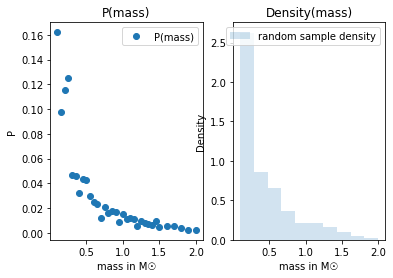

In [428]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(mass)")
axs[0].plot(x, y, 'o', label='P(mass)')
axs[0].set_xlabel('mass in M☉')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(mass)")
axs[1].hist(sample, density=True, histtype='stepfilled', alpha=0.2, label='random sample density')
axs[1].set_xlabel('mass in M☉')
axs[1].set_ylabel('Density')
axs[1].legend()
plt.show()

## Continuous random variable fit
*Fitting a truncated exponential distribution to the random sample*

In [441]:
upper, lower = x.max(), x.min()
mu = lower
sigma = x.std() ** 2
b = (upper - lower) / sigma

b, mu, sigma

(6.642156099080852, 0.1, 0.28605169340463465)

In [430]:
from scipy.stats import truncexpon
from scipy.stats import kstest

dist = truncexpon(b=b, loc=mu, scale=sigma)
r = kstest(sample, [b, mu, sigma], 'truncexpon')
r

KstestResult(statistic=0.3333333333333333, pvalue=0.7779776755964299)

*Density function from the fitted continuous random variable*

In [431]:
y_pdf =  [dist.pdf(xi) for xi in x]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [432]:
fit_sample = dist.rvs(size=10000)

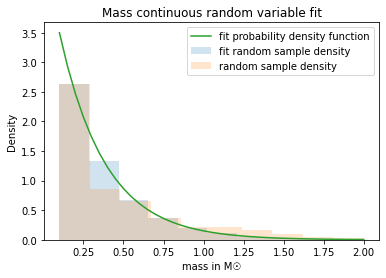

In [433]:
_, ax = plt.subplots()
ax.set_title(r"Mass continuous random variable fit")
ax.hist(fit_sample, density=True, histtype='stepfilled', alpha=0.2, label='fit random sample density')
ax.hist(sample, density=True, histtype='stepfilled', alpha=0.2, label='random sample density')
ax.plot(x, y_pdf, '-', label='fit probability density function')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [.1, 2.0]*

In [434]:
all(v >= .1 and v <= 2 for v in fit_sample)

True